# Bayesian inference tutorial: a hello world example

The goal is to find a statistical model with its parameters that explains the data.

So, let's assume we've got some data, regarding the height of Python developers.

This is our data: 

In [1]:
x = [183, 168, 177, 170, 175, 177, 178, 166, 174, 178]

### Deciding a model

The first thing once we've got some data is decide which is the model that generated the data. In this case we decide that the height of Python developers comes from a *normal distribution*.

A normal distribution has two parameters, the mean $\mu$ and the standard deviation $\sigma$ (or the variance $\sigma^2$ which is equivalent, as it's just the square of the standard deviation).

Deciding which model to use can be obvious in few cases, but it'll be the most complex part of the statistical inference problem in many others. Some of the obvious cases are:
* The *Normal distribution* when modelling natural phenomena like human heights.
* The *Beta distribution* when modelling probability distributions.
* The *Poisson distribution* when modelling the frequency of events occurring.

In many cases we will use a combination of different distributions to explain how our data was generated.

Each of these distribution has parameters, \alpha and \beta for the *Beta distribution*, \lambda for the *Poisson*, or $\mu$ and $\sigma$ for the *normal distribution* of our example.

The goal of *inference* is to find the best values for these parameters.

### Evaluating a set of parameters

Before trying to find the best parameters, let's choose some arbitrary parameters, and let's evaluate them.

For example, we can choose the values $\mu=175$ and $\sigma=5$. And to evaluate them, we'll use the Bayes formula:

$$P(\theta|x) = \frac{P(x|\theta) \cdot P(\theta)}{P(x)}$$

Given a model, a *normal distribution* in this case, $P(\theta|x)$ is the probability that the parameters $\theta$ (which are $\mu$ and $\sigma$ in this case) given the data $x$.

The higher the probability of the parameters given the data, the better they are. So, this value is the score we will use to decide which are the best parameters $\mu$ and $\sigma$ for our data $x$, assuming data comes from a *normal distribution*.

### Parts of the problem

To recap, we have:
* **Data** $x$: [183, 168, 177, 170, 175, 177, 178, 166, 174, 178]
* A **model**: the *normal distribution*
* The **parameters** of the model: $\mu$ and $\sigma$

And we're interested in finding the best values for $\mu$ and $\sigma$ for the data $x$, for example $\mu=175$ and $\sigma=5$.

### Bayes formula

Back to Bayes formula for conditional probability:

$$P(\theta|x) = \frac{P(x|\theta) \cdot P(\theta)}{P(x)}$$

We already mentioned that $P(\theta|x)$ is the probability of the parameter values we're checking given the data $x$. And assuming our data is generated by the model we decided, the *normal distribution*. And this is the value we're interested in maximizing. In Bayesian terminology, $P(\theta|x)$ is known as the **posterior**.

The *posterior* is a function of three other values.

$P(x|\theta)$: the **likelihood**, which is the probability of obtaining the data $x$ if the parameters $\sigma$ were the values we're checking (e.g. $\mu=175$ and $\sigma=5$). And always assuming our data is generated by our model, the *normal distribution*.

$P(\theta)$: the **prior**, which is our knowledge about the parameters before seeing any data.

$P(x)$: the **evidence**, which is the probability of the data, not given any specific set of parameters $\sigma$, but given the model we choose, the *normal distribution* in the example.

### Likelihood

The likelihood is the probability of obtaining the data $x$ from the choosen model (e.g. the *normal distribution*) and for a specific set of parameters $\theta$ (e.g. $\mu=175$ and $\sigma=5$).

It is often represented as $\mathcal{L}(\theta|x)$ (note that the order of $\theta$ and $x$ is reversed to when the probability notation is used).

In the case of a normal distribution, the formula to compute the probability given $x$ (its probability density function) is:

$$P(x|\theta) = P(x| \mu, \sigma)  = \frac{1}{\sqrt{2 \pi \sigma^2}} \cdot e^{-\frac{(x - \mu)^2}{2 \sigma^2}}$$

If we plot it, we obtain the famous normal bell curve (we use $\mu=0$  and $\sigma=1$ in the plot):

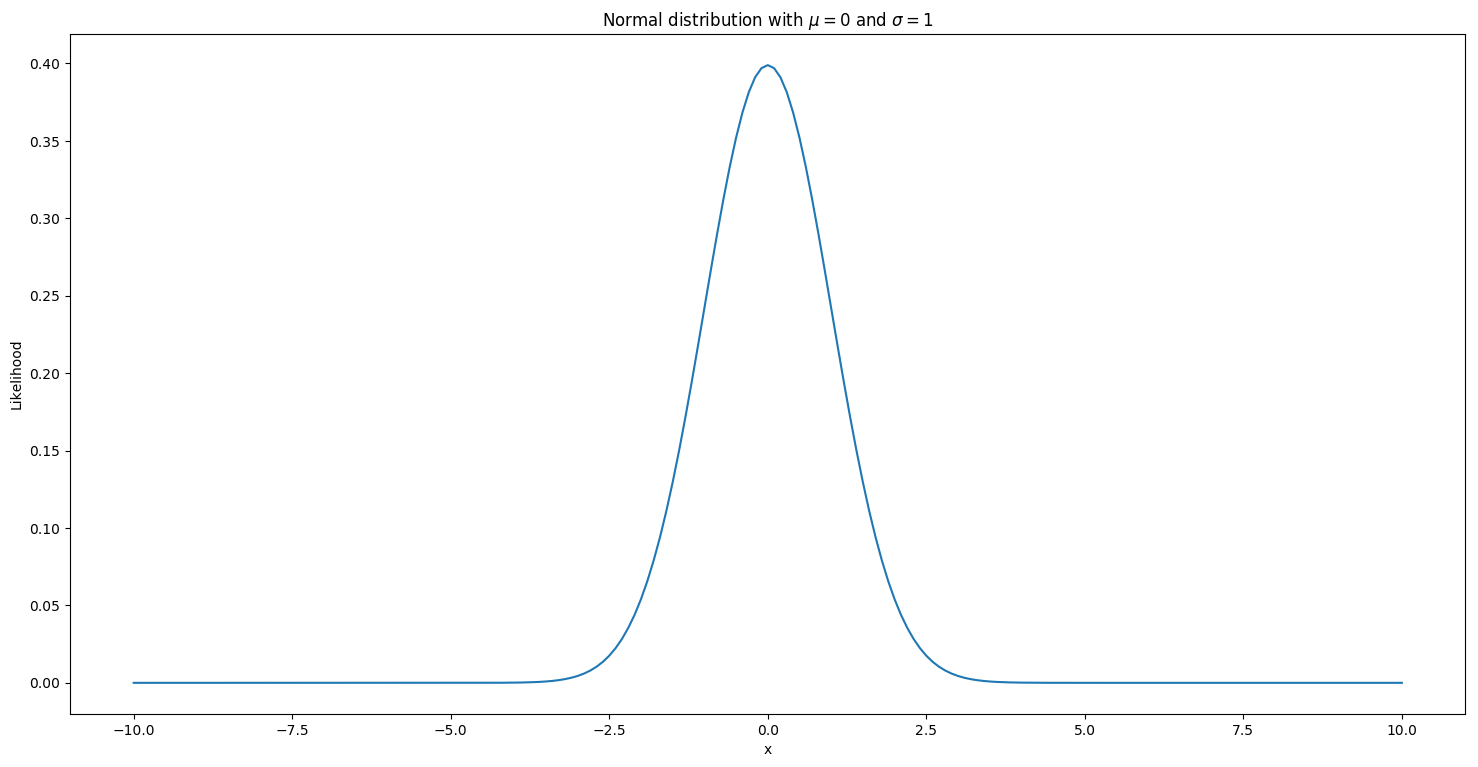

In [2]:
import numpy
import scipy.stats
from matplotlib import pyplot

mu = 0.
sigma = 1.

x = numpy.linspace(-10., 10., 201)
likelihood = scipy.stats.norm.pdf(x, mu, sigma)

pyplot.plot(x, likelihood)
pyplot.xlabel('x')
pyplot.ylabel('Likelihood')
pyplot.title('Normal distribution with $\mu=0$ and $\sigma=1$');

Following the example, we wanted to score how good are the parameters $\mu=175$ and $\sigma=5$ for our data. So far we choosen these parameters arbitrarily, but we'll choose them in a smarter way later on.

If we take the probability density function (p.d.f.) of the *normal distribution* and we compute for the first data point of $x$ 183, we have:

$$P(x | \mu, \sigma)  = \frac{1}{\sqrt{2 \pi \sigma^2}} \cdot e^{-\frac{(x - \mu)^2}{2 \sigma^2}}$$

where $\mu=175$, $\sigma=5$ and $x=183$, so:

$$P(x=183 | \mu=175, \sigma=5)  = \frac{1}{\sqrt{2 \cdot \pi \cdot 5^2}} \cdot e^{-\frac{(183 - 175)^2}{2 \cdot 5^2}}$$

If we do the math:

In [3]:
import math

1. / math.sqrt(2 * math.pi * (5 **2)) * math.exp(-((183 - 175) ** 2) / (2 * (5 ** 2)))

0.022184166935891113

This is the probability that 183 was generated by a *normal distribution* with mean 175 and standard deviation 5.

With *scipy* we can easily compute the likelihood of all values in our data:

In [4]:
import scipy.stats

mu = 175
sigma = 5

x = [183, 168, 177, 170, 175, 177, 178, 166, 174, 178]

scipy.stats.norm.pdf(x, mu, sigma)

array([ 0.02218417,  0.02994549,  0.07365403,  0.04839414,  0.07978846,
        0.07365403,  0.06664492,  0.01579003,  0.07820854,  0.06664492])

### Prior

The prior is our knowledge of the parameters before we observe the data. It's probably the most subjective part of Bayesian inference, and different approaches can be used.

We can use informed priors, and try to give the model as much information as possible. Or use uninformed priors, and let the process find the parameters using mainly the data.

In our case, we can start thinking on which are the possible values for a normal distribution.

For the *mean*, the range is between $-\infty$ and $\infty$. But we can of course do better than this.

We're interested on the mean of Python developers height. And it's easy to see that the minimum possible height is $0$. And for the maximum, we can start by considering the maximum known human height. This is 272 cms, the maximum measured height of Robert Pershing Wadlow, born in 1918. We can be very confident that the mean of the height of Python developers is in the range $0$ to $272$. So, a first option for an *uninformed* prior could be all the values in this range with equal probability.

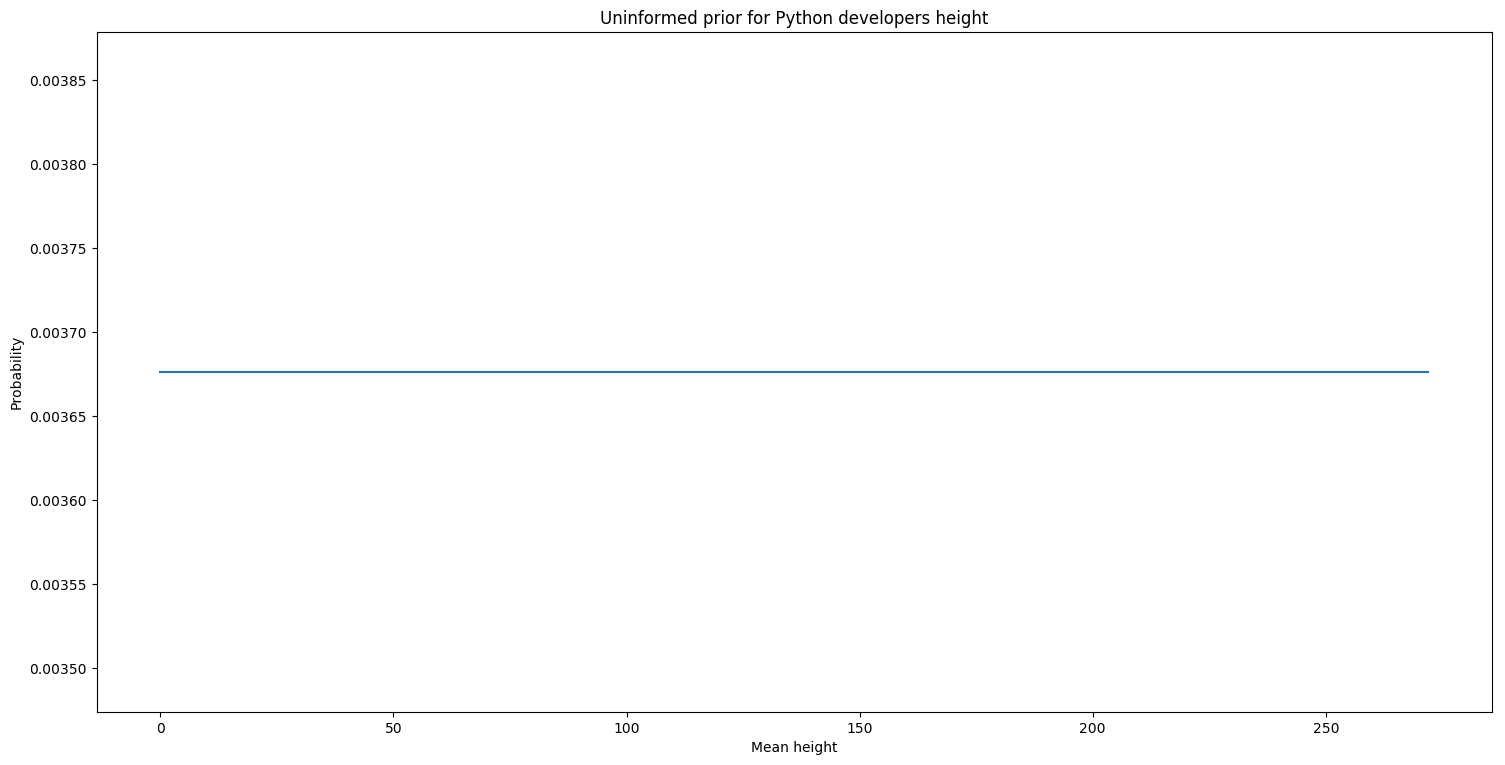

In [5]:
import numpy
import scipy.stats
from matplotlib import pyplot

mean_height = numpy.linspace(0, 272, 273)
probability = scipy.stats.uniform.pdf(mean_height, 0, 272)

pyplot.plot(mean_height, probability)
pyplot.xlabel('Mean height')
pyplot.ylabel('Probability')
pyplot.title('Uninformed prior for Python developers height');

This could work, but we can do better. Just having 10 data points, the amount of information that we can *learn* from them is quite limited. And we may *use* these 10 data points to discover something we already know. That the probability of the mean height being 0 is nil, as it is the probability of the maximum ever observed height. And that the probability of a value like 175 cms is much higher than the probability of a value like 120 cms.

If we know all this before observing any data, why not use it? This is exactly what a prior is. The tricky part is defining the exact prior.

In this case, we don't know the mean of the height of Python developers, but we can check the mean of the height of the world population, which is arond 165. This doesn't need to be the value we're looking for. It's known that there are more male than female Python programmers. And male height is higher, so the value we're looking for will probably be higher. Also, height changes from country to country, and Python programmers are not equally distributed around the world. But we will use our data to try to find the value that contains all these biases. The prior is just a starting point that will help find the value faster.

So, let's use the mean of the world population as the mean of our prior, and we'll take the standard deviation of the world population, 7 cms, and we'll use the double of it. Multiplying it by 2 is arbitrary, but we'll make our prior a bit less *informed*. As mentioned before, choosing a prior is quite subjective.

Note that it's not necessary to use a normal distribution for the prior. We were considering a uniform distribution before. But in this case it can make sense, as we're more sure than the mean we're looking for will be close to the mean of the human population.

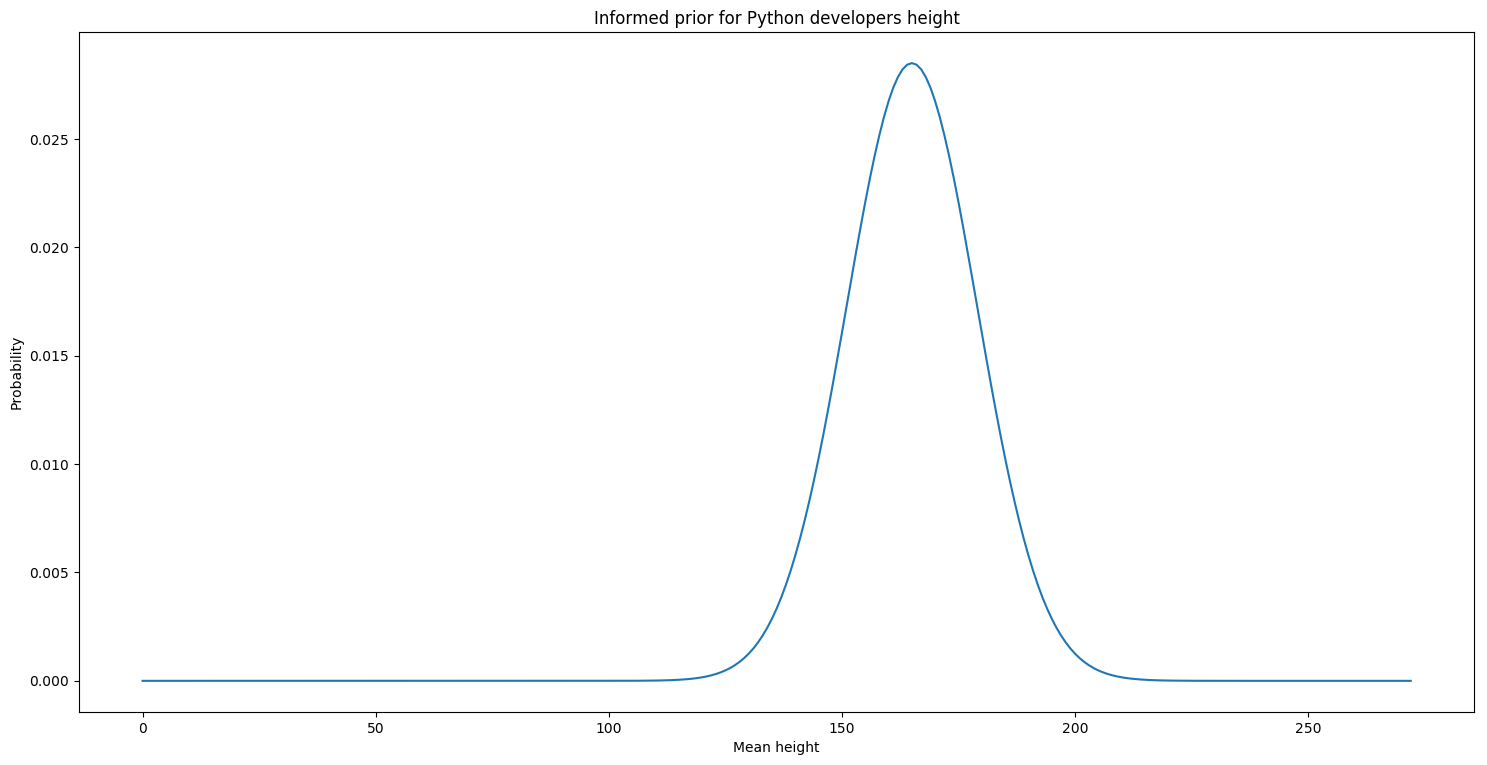

In [6]:
import numpy
import scipy.stats
from matplotlib import pyplot

world_height_mean = 165
world_height_standard_deviation = 7

mean_height = numpy.linspace(0, 272, 273)
probability = scipy.stats.norm.pdf(mean_height, world_height_mean, world_height_standard_deviation * 2)

pyplot.plot(mean_height, probability)
pyplot.xlabel('Mean height')
pyplot.ylabel('Probability')
pyplot.title('Informed prior for Python developers height');

If we go back to our example, we can easily compute the prior for the first sample in $x$.

In [7]:
import scipy.stats

world_height_mean = 165
world_height_standard_deviation = 7

x = [183, 168, 177, 170, 175, 177, 178, 166, 174, 178]

scipy.stats.norm.pdf(x[0], world_height_mean, world_height_standard_deviation * 2)

0.01246879102010001

### Evidence

The evidence is the probability of the data $P(x)$. The whole Bayesian formula assumes the model we choose, so it can be seen as the probability of the model coming from a *normal distribution* (or any distribution or combination of them we're using for the problem).

We can see the probability of the data coming from a *normal distribution* like the sum of the probabilities of the data coming from each of the possible parameters.

If we consider the height a *discrete* variable, and the range of its values $0$ to $272$. And we ignore that the normal has the *standard deviation* parameter, this could be expressed as:

$$P(x) = \sum_{i=0}^{272} P(x|\mu_i)$$

Each of the probabilities $P(\mu_i)$ is a *likelihood*, and we've already seen how to compute them.

In practise, we can't ignore the simplifications we made. We first need to consider the *standard deviation*. Then we need to consider that both are *continuous* and not *discrete*. Being continuous means that instead of a sum, we have an integral. And finally, we will consider the interval $-\infty$ yo $\infty$ instead of $0$ to $272$.

The actual equation considering these things is:

$$P(x) = \int_{-\infty}^{\infty} P(x|\theta) \cdot d\theta$$

Mathematically, this equation is more complex than the previous, but conceptually they are the same.

### Posterior

The posterior is the probability of the parameters given the data $P(\theta|x)$, and it's our quantity of interest, as it represets how good the tested parameters are.

As we've seen, the posterior is the result of the product of the *likelihood* and the *prior*, divided by the *evidence*:

$$P(\theta|x) = \frac{P(x|\theta) \cdot P(\theta)}{P(x)}$$

We've seen that computing the *likelihood* and the *prior* is quite straight-forward. But the *evidence* can be trickier, or simply too complex. The good news is that even if we can't compute the denominator, as it's the same for all parameters, we can still find the best without it.

The *posterior* is proportional to the numerator. Which means that even if we don't know the exact value of the *posterior*, the higher *posterior* will be the one with the higher nominator (the *likelihood* multiplied by the *prior*). We can represent it by:

$$P(\theta|x) \propto P(x|\theta) \cdot P(\theta)$$

Let's go back to our example and compute this for the first sample in $x$:

In [8]:
import scipy.stats

x = [183, 168, 177, 170, 175, 177, 178, 166, 174, 178]

mu = 175
sigma = 5

world_height_mean = 165
world_height_standard_deviation = 7

prior = scipy.stats.norm.pdf(x[0], world_height_mean, world_height_standard_deviation * 2)

likelihoods = scipy.stats.norm.pdf(x, mu, sigma)

prior * likelihoods[0]

0.00027660974147863861

The next step is to compute the posterior for every data point in $\x$. And to do it we'll see the beauty of the *Bayesian method*.

The idea of the *Bayesian method* is that we start with our *prior* knowledge, which is what we know before seeing any data. And then we update it with the *likelihood*, which is our knowledge of the parameters given the data.

The interesting part is that after having our *prior* knowledge, and updating it with what we know from the first data point, what we have is the *prior* knowledge of the other data points.

So, we start with our *prior*, we multiply it by the *likelihood* of the first data point, and we've got a *posterior*. Which at the same time we can use again as the *prior* for the second data point, and obtain the *posterior* for the two first data points.

If we repeat the process for each data point, we'll obtain the *posterior* for the whole dataset:

In [9]:
import scipy.stats

x = [183, 168, 177, 170, 175, 177, 178, 166, 174, 178]

mu = 175
sigma = 5

world_height_mean = 165
world_height_standard_deviation = 7

prior = scipy.stats.norm.pdf(x[0], world_height_mean, world_height_standard_deviation * 2)

likelihoods = scipy.stats.norm.pdf(x, mu, sigma)

posterior = prior
for likelihood in likelihoods:
    posterior = posterior * likelihood

posterior

9.516913237351312e-16

This can of course be vectorized:

In [10]:
import scipy.stats

x = [183, 168, 177, 170, 175, 177, 178, 166, 174, 178]

mu = 175
sigma = 5

world_height_mean = 165
world_height_standard_deviation = 7

prior = scipy.stats.norm.pdf(x[0], world_height_mean, world_height_standard_deviation * 2)

prior * scipy.stats.norm.pdf(x, mu, sigma).prod()

9.516913237351312e-16

### The logarithm trick

As we can see, even with few data points, we've got very small probabilities. This can be a problem, as even if computers can represent very small numbers with floatting point notation, the representation is discrete, and very small probabilities will be rounded to $0$ at some point. And after that, any product with it will be $0$, generating invalid results.

There is a trick for that, that is use the logarithm of probabilities, instead of the probabilities themselves. And this has an additional advantage: the product of probabilities becomes an addition of log probabilities. Which is much faster to compute, as we can see:

In [11]:
import numpy

random_numbers = numpy.random.random(100_000_000)

%time random_numbers.prod()

%time random_numbers.sum()

CPU times: user 213 ms, sys: 0 ns, total: 213 ms
Wall time: 215 ms
CPU times: user 89.8 ms, sys: 0 ns, total: 89.8 ms
Wall time: 90.5 ms


49997779.482481197

This is a common trick, and *scipy* provides functions to compute the log probabilities directly. Our final code would be:

In [12]:
import math
import scipy.stats

x = [183, 168, 177, 170, 175, 177, 178, 166, 174, 178]

mu = 175
sigma = 5

world_height_mean = 165
world_height_standard_deviation = 7

prior = scipy.stats.norm.logpdf(x[0], world_height_mean, world_height_standard_deviation * 2)

posterior = prior + scipy.stats.norm.logpdf(x, mu, sigma).sum()

math.exp(posterior)

9.51691323735136e-16

In practise, we don't need to compute the last step, as we don't care about the exact value of the probability (which we don't obtain because we ignore the denominator of the *Bayes formuala*). And if we just care about which is the highest probability, we can use the logarithm, as it is proportional to the probability:

$$\log P(\theta|x) \propto P(\theta|x)$$

### Grid based Bayesian inference

Ok, so now we're able to take arbitrary parameters, and compute how good they explain our data, by calculating a value proportional to the *posterior* $P(\theta|x)$ (we'll call it *posterior* from now on, even if it's not technically correct).

But, how we can compute the best paramters? The simplest approach would be to simply compute the value of all the possible combinations of paramters, and see which is the one with higher *posterior*.

Let's do it just for the mean so far, and testing 10,000 different parameters:

CPU times: user 2.78 s, sys: 0 ns, total: 2.78 s
Wall time: 2.8 s


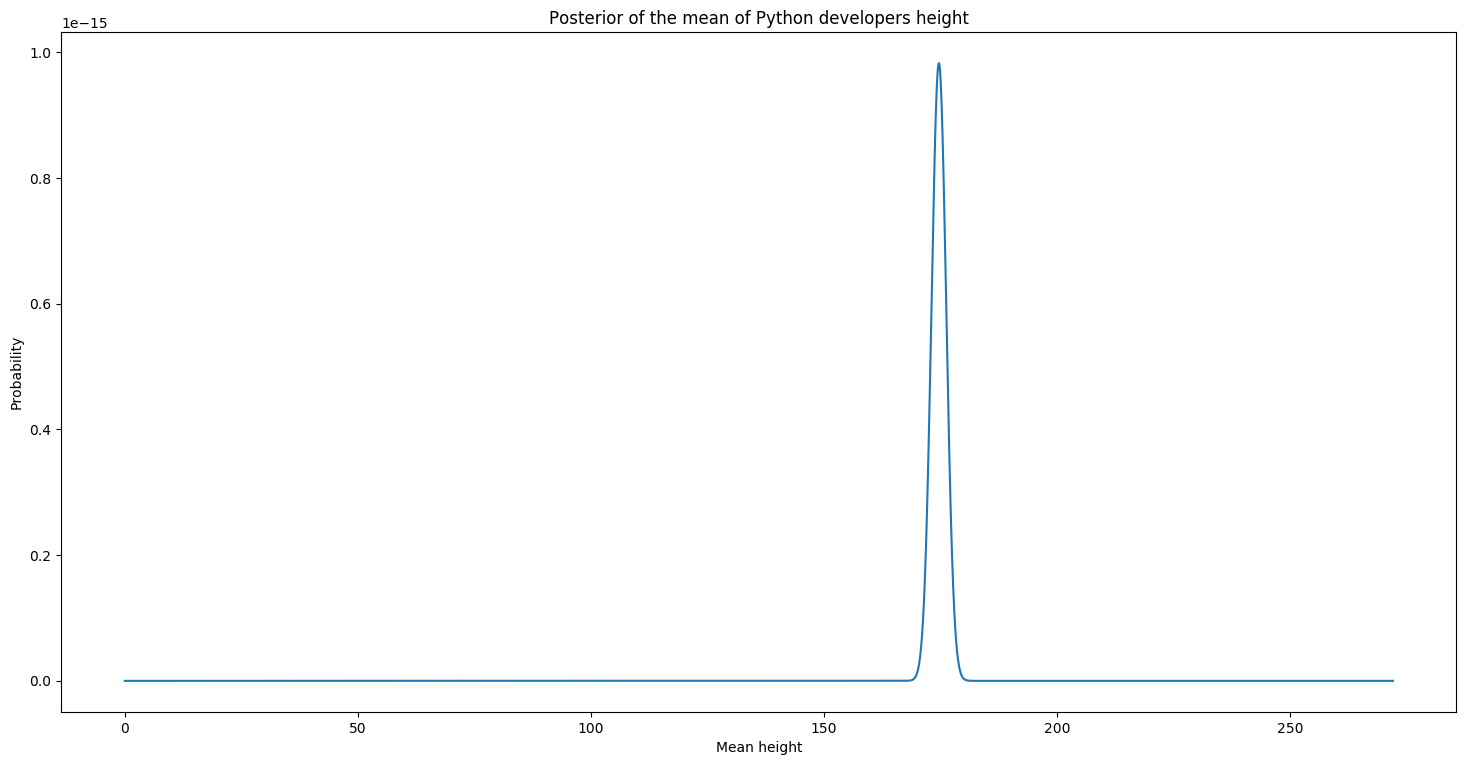

In [13]:
import numpy
import scipy.stats

x = [183, 168, 177, 170, 175, 177, 178, 166, 174, 178]

world_height_mean = 165
world_height_standard_deviation = 7

mu_candidates = numpy.linspace(0., 272, 10_000)
sigma = 5.

mu_prior = scipy.stats.norm.logpdf(x[0], world_height_mean, world_height_standard_deviation * 2)

def compute_posteriors(x, prior, mu_candidates, sigma):
    posteriors = []
    for mu in mu_candidates:
        posterior = prior + scipy.stats.norm.logpdf(x, mu, sigma).sum()
        posteriors.append(posterior)
    return posteriors

%time posteriors = compute_posteriors(x, prior, mu_candidates, sigma)

pyplot.plot(mu_candidates, numpy.exp(posteriors))
pyplot.xlabel('Mean height')
pyplot.ylabel('Probability')
pyplot.title('Posterior of the mean of Python developers height');

As we can see, given the *prior* we defined, and the data $x$ we observed, we can see that the mean of the heaight of Python programmers should be between 170 and 180 cms.

Note that the distribution we observe is NOT the distribution of the height of Python programmers. It's the distribution of its mean. So, it is telling us what we know about the mean, but we ignored the standard deviation from the problem.

So, this is not yet our final solution, because we made two simplifications:
* We assumed the standard deviation was known, and we didn't compute its posterior.
* We defined a discrete number of mean heights we wanted to compute the posterior for.

So, the final solution should consider a continuous and infinite number of possible height means, and for each of them also compute the posterior of a continuous and infinite number of possible standard deviations.

Even if we just consider a limited values of both, the number of combinations of parameters becomes huge, when the number of parameters increase.

So, grid-based methods are great when the number of possible parameters is small, but it's not feasible when the number of parameters and their values grow.

### MCMC

Markov Chain Monte Carlo (MCMC) is a sampling method that instead of exploring all possible combinations of parameters, explore a feasible number of them, by considering how good he combinations already explored are.

The details of how it works are omitted, but this would be the implementation of the previous problem in PyMC3, using NUTS, one of the available algorithms.

100%|██████████| 10500/10500 [00:11<00:00, 894.57it/s]


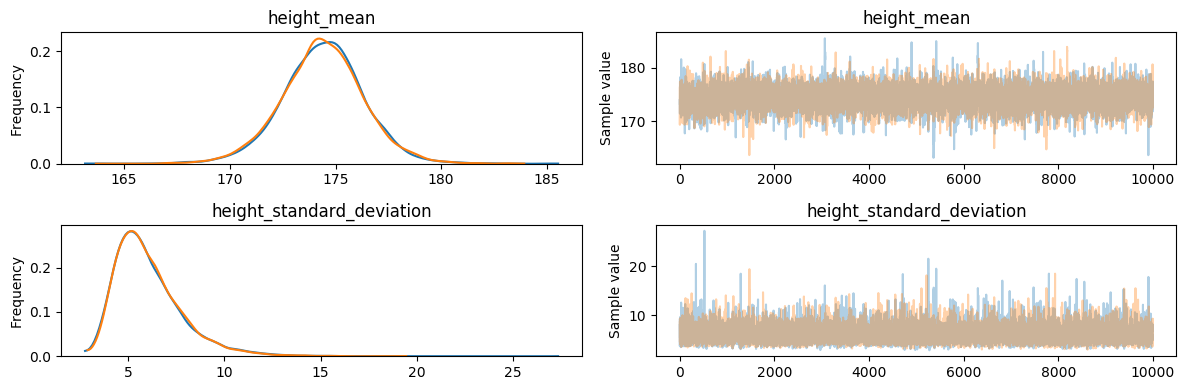

In [14]:
import pymc3

x = [183, 168, 177, 170, 175, 177, 178, 166, 174, 178]

world_height_mean = 165
world_height_standard_deviation = 7

with pymc3.Model() as model:
    height_mean = pymc3.Normal('height_mean', world_height_mean, world_height_standard_deviation * 2)
    height_standard_deviation = pymc3.Uniform('height_standard_deviation', 0., world_height_standard_deviation * 5)
    python_programmers_height = pymc3.Normal('python_programmers_height',
                                             height_mean,
                                             height_standard_deviation,
                                             observed=x)

    traces = pymc3.sample(10_000, step=pymc3.NUTS())

pymc3.traceplot(traces);

As we can see, even if MCMC does not sample all possible combination of parameters, it is able to return the probability distributions of the mean of the height of Python programmers, and the standard deviation.

We can see how with the amount of data provided (just 10 samples), there is a lot of uncertainty on both. But if we obtain more samples, the distributions will narrow, and we'll get closer plausible results.